# Introduction to Quantum Optics

In [3]:
%pip install qutip
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import qutip as qt

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import cm
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from IPython.display import HTML

## Example: Cavity decay

What is a photon and how do we think about it? We can start with a cavity. Below is a *nanobeam cavity*. It is essentially a beam of a material with a high index of refraction surrounded by air. The holes act as two mirrors facing each other that trap light. A photon in a cavity has a longer lifetime than in free space. 

Below is a nanobeam cavity I made at Birck Nanotechnology center, along with a simulation of the electromagnetic field in the cavity region. The cavity is about 1% the thickness of a human hair (450 nm vs. 50 $\mu \rm m$)

<img src="cav_sim.png" width="300" height="200" />

In [5]:
# Frequency domain cavity resonance measurement
HTML("""
    <video width="320" height="240" controls>
        <source src="https://raw.githubusercontent.com/christianlange196/qsap-2023/main/dev1-2-iim3.mp4" type="video/mp4">
    </video>
""")

### 1. A quantum state

The quantum state of the cavity can have 0 photons, 1 photons, 2 photons, etc. Because we cannot simulate infinitely many photons, we cut off the number photons at some point, call it $N$. These states form our *basis*. 

$$
\left| \psi \right\rangle = \left| 0 \right>, \left| 1 \right>, \cdots \left| N \right> 
$$

In [6]:
# The quantum state of a cavity with up to N photons
# There are 11 total states: 0, 1, 2, ..., 10
N = 11

# We can put psi0 in the state of the cavity with 10 photons
# qt.tensor makes a quantum object
# qt.basis(N,10) makes a quantum state with 10 photons in a basis of N states
psi0 = qt.tensor(qt.basis(N, 10))

### 2. A Hamiltonian

The Hamiltonian is the energy of the system. The energy of this system is simply the number of photons in the cavity. 

$$
H = \hbar \omega_0 \hat{n}
$$

Here, $\hat{n}$ is the *number operator*, which counts the number of photons in the cavity: $ \hat{n} \left| n \right> = n \left| n \right> $.
In other words,

$$
E = \rm{energy \ of \ one \ photon} \times \rm{number \ of \ photons} 
$$


Actually, to be precise, even if there are zero photons, there is also some energy in the vacuum, called the *zero point energy*: $ H = \hbar \omega_0 \left( \hat{n} + \frac{1}{2} \right) $. But we can ignore that for now.



In [7]:
# Define the Hamiltonian
# Note that we have set hbar = 1 and omega = 1
# n is the number operator
n = qt.tensor(qt.num(N))
H = n 

### 3. Dissipation

No quantum system lasts forever&mdash;they all decay. The cavity leaks both into the waveguide and into free space. We can represent this with *collapse operators*. The following collapse operator $\mathcal{C}$ represents the loss of a photon at a rate of $\kappa$. 

$$
\mathcal{C} = \sqrt{\kappa} \hat{a}
$$

Here, $\hat{a}$ is the annihilation operator, which removes a photon from the cavity.

In [8]:
# Define the collapse operators
# kappa is the decay rate of the cavity
# c_ops is a list of collapse operators
# qt.destroy(N) destroys a single photon
kappa = 0.5
a = qt.tensor(qt.destroy(N))
c_ops = [np.sqrt(kappa) * a]

### 4. Time evolution

We will evolve the system using the *Monte-Carlo* solver. This solver uses the Hamiltonian to evolve the system, and allows it to collapse at random times according to the collapse operators. The more *trajectories* we use, the more accurate the simulation will be.

In [9]:
# Define the time vector
t = np.linspace(0, 10, 100)

# Solve with monte carlo
res1 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=1)
res2 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=10)
res3 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=100)

Total run time:   0.03s


10.0%. Run time:   8.28s. Est. time left: 00:00:01:14
20.0%. Run time:   8.32s. Est. time left: 00:00:00:33
30.0%. Run time:   8.33s. Est. time left: 00:00:00:19
40.0%. Run time:   8.35s. Est. time left: 00:00:00:12
50.0%. Run time:   8.38s. Est. time left: 00:00:00:08
60.0%. Run time:   8.45s. Est. time left: 00:00:00:05
70.0%. Run time:   8.45s. Est. time left: 00:00:00:03
80.0%. Run time:   8.45s. Est. time left: 00:00:00:02
90.0%. Run time:   8.67s. Est. time left: 00:00:00:00
100.0%. Run time:   8.82s. Est. time left: 00:00:00:00
Total run time:   8.93s
10.0%. Run time:   7.20s. Est. time left: 00:00:01:04
20.0%. Run time:   7.32s. Est. time left: 00:00:00:29
30.0%. Run time:   7.41s. Est. time left: 00:00:00:17
40.0%. Run time:   7.49s. Est. time left: 00:00:00:11
50.0%. Run time:   7.56s. Est. time left: 00:00:00:07
60.0%. Run time:   7.61s. Est. time left: 00:00:00:05
70.0%. Run time:   7.67s. Est. time left: 00:00:00:03
80.0%. Run time:   7.73s. Est. time left: 00:00:00:01
90.

### 5. Plot the results!

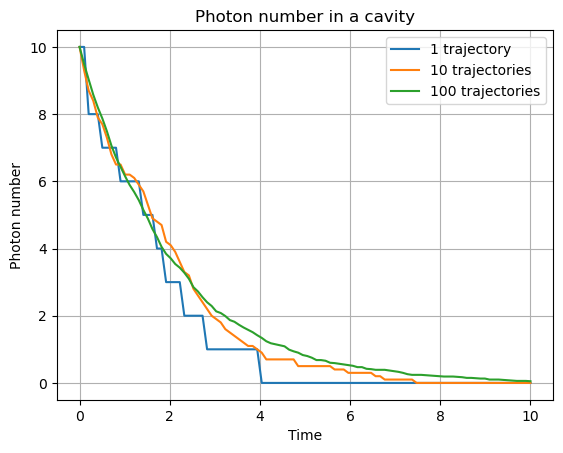

In [10]:
fig, ax = plt.subplots()
ax.plot(t, res1.expect[0], label='1 trajectory')
ax.plot(t, res2.expect[0], label='10 trajectories')
ax.plot(t, res3.expect[0], label='100 trajectories')
ax.set_xlabel('Time')
ax.set_ylabel('Photon number')
ax.set_title('Photon number in a cavity')
ax.grid(True)
ax.legend()

#### Classical simulation

In this classical simulation (using MEEP in Python), I used a pulse of light to populate a cavity. You can watch as it decays. 

In [11]:
# Time-domain classical simulation of cavity decay
HTML("""
    <video width="320" height="240" controls>
        <source src="https://raw.githubusercontent.com/christianlange196/qsap-2023/main/cavity_res.mp4" type="video/mp4">
    </video>
""")

## Example: A driven cavity

### The Hamiltonian

We can drive the cavity with a term that creates photons at a certain rate $\Omega a^\dagger$. The rate is called the *Rabi frequency*. $a^\dagger$ is the *creation operator* - the opposite of the destruction operator. We need both $a^\dagger$ and $a$. Why is that?

$$
H_D = \hbar \Omega \left( a^\dagger + a \right)
$$

10.0%. Run time:   8.47s. Est. time left: 00:00:01:16
20.0%. Run time:   9.34s. Est. time left: 00:00:00:37
30.0%. Run time:  10.10s. Est. time left: 00:00:00:23
40.0%. Run time:  10.94s. Est. time left: 00:00:00:16
50.0%. Run time:  11.69s. Est. time left: 00:00:00:11
60.0%. Run time:  12.40s. Est. time left: 00:00:00:08
70.0%. Run time:  13.21s. Est. time left: 00:00:00:05
80.0%. Run time:  14.01s. Est. time left: 00:00:00:03
90.0%. Run time:  14.76s. Est. time left: 00:00:00:01
100.0%. Run time:  15.46s. Est. time left: 00:00:00:00
Total run time:  15.55s


Text(0.5, 1.0, 'Photon number in a cavity')

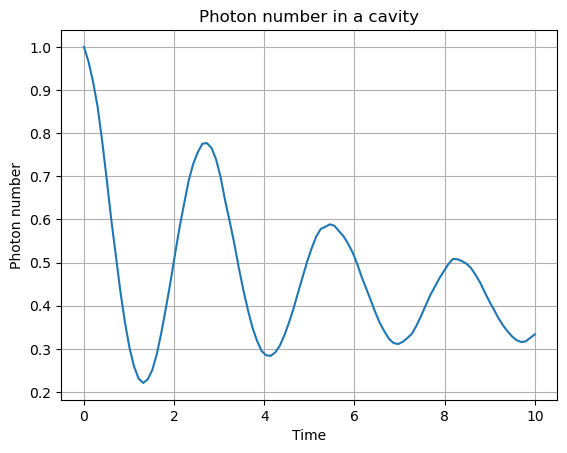

In [12]:
# Define the Hamiltonian
N = 1 + 1  # number of photon states
Omega = 1  # Rabi frequency
H_0 = qt.num(N) + 1/2
H_D = Omega* (qt.destroy(N) + qt.create(N))
H = H_0 + H_D

gamma = 0.25  # decay rate
c_ops = [np.sqrt(gamma) * qt.destroy(N)]

# Define the initial state
psi0 = qt.basis(N, N - 1)

# Define the time vector
t = np.linspace(0, 10, 100)

# Solve with monte carlo
res3 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=1000)

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, res3.expect[0], label='1000 trajectories')
ax.grid(True)
ax.set_xlabel('Time')
ax.set_ylabel('Photon number')
ax.set_title('Photon number in a cavity')

## Example: An atom decaying

### An oscillating dipole 

Below is some experimental data of a molecule of dibenzoterrylene decaying. It's actually a histogram of about 100 million decays. 

<img src="decay_exp.png" width="300" height="200" />

### The Hamiltonian for an atom

$\sigma$ is the *lowering operator*, which removes a photon from the atom. 

$$
\begin{align}
\sigma \left| 1 \right> &= \left| 0 \right> \\
\sigma \left| 0 \right> &= 0
\end{align}
$$

The opposite of the lowering operator is the *raising operator*, $\sigma^\dagger$, which adds a photon to the atom. $\sigma^\dagger \sigma$ is the number of photons in the atom: it gives 1 if the atom has a photon and 0 if it is empty. The energy of a photon is $\hbar \omega_0$, so the energy of the atom is as follows. 

$$
H = \hbar \omega_0 \sigma^\dagger \sigma
$$

10.0%. Run time:   7.41s. Est. time left: 00:00:01:06
20.0%. Run time:   7.52s. Est. time left: 00:00:00:30
30.0%. Run time:   7.58s. Est. time left: 00:00:00:17
40.0%. Run time:   7.63s. Est. time left: 00:00:00:11
50.0%. Run time:   7.68s. Est. time left: 00:00:00:07
60.0%. Run time:   7.72s. Est. time left: 00:00:00:05
70.0%. Run time:   7.76s. Est. time left: 00:00:00:03
80.0%. Run time:   7.79s. Est. time left: 00:00:00:01
90.0%. Run time:   7.82s. Est. time left: 00:00:00:00
100.0%. Run time:   7.99s. Est. time left: 00:00:00:00
Total run time:   8.11s


Text(0.5, 1.0, 'Excitation probability of a qubit')

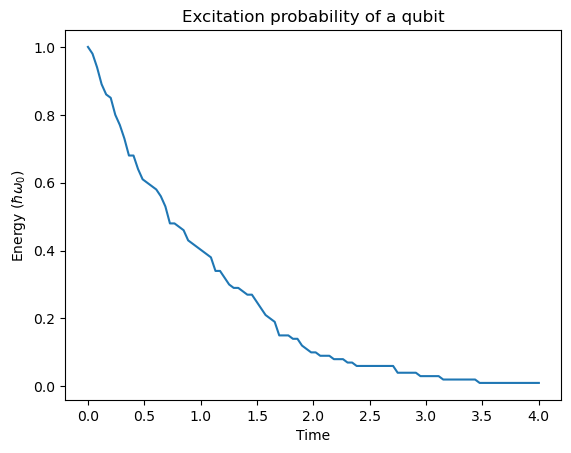

In [13]:
# Define the Hamiltonian
# qt.sigmap() is the raising operator "sigma_plus"
# qt.sigmam() is the lowering operator "sigma_minus"
H = qt.sigmap() * qt.sigmam()

# Define the decay
gamma = 1.  # decay rate

# Define the initial state
psi0 = qt.basis(2, 0)  # excited state

# Define the expectation operators
# Let's say that we want to know the energy
e_ops = [H]

# Define the time vector
t = np.linspace(0, 4, 100)

# Solve with monte carlo
res = qt.mcsolve(H, psi0, t, [np.sqrt(gamma) * qt.sigmam()], e_ops=e_ops, ntraj=100)

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, res.expect[0], label='100 trajectory')
ax.set_xlabel('Time')
ax.set_ylabel('Energy $(\hbar \omega_0)$')
ax.set_title('Excitation probability of a qubit')

In [14]:
def visualize_atom(t, exp):
    omega = 0.5

    cart2th = lambda x, y : np.arctan2(y, x)
    cart2r = lambda x, y : np.sqrt(x**2 + y**2)

    E_th = lambda r, theta, tau : np.sin(theta) * np.exp(1j * r - 1j * omega * tau) * (1/r**3 - 1j/r**2 - 1/r)
    E_r = lambda r, theta, tau : np.cos(theta) * np.exp(1j * r - 1j * omega * tau) * (2/r**3 - 2j/r**2)
    def E_tot(x,y, tau):
        r = cart2r(x,y)
        theta = cart2th(x,y)
        field = np.real(E_r(r, theta, tau) + E_r(r, theta, tau))
        field[r<2.] = np.sign(field[r<2.])
        return field.transpose()

    N = 100
    d = 15
    x = np.linspace(-d, d, N)
    y = np.linspace(-d, d ,N)
    X, Y = np.meshgrid(x, y)


    fig, ax = plt.subplots()
    cax = ax.imshow(E_tot(X,Y, 100), cmap='RdBu_r', animated=True)
    plt.close()

    def update(frame):
        cax.set_array(E_tot(X, Y, frame) * exp[frame] / np.max(exp))  # Update the phase based on the frame
        return cax,

    ani = FuncAnimation(fig, update, frames=len(t), blit=True, interval=1000/20)  # 20 fps

    return ani

In [15]:
animation = visualize_atom(t, res.expect[0])
HTML(animation.to_jshtml())

## Example: An atom in a cavity

### The Jaynes-Cummings Hamiltonian
If we want to put an atom *inside* of a cavity, all we have to do is make a term that takes a photon from the atom and gives it to the cavity and vice versa. This looks like $a^\dagger \sigma_-$ and $a \sigma_+$. Oure atom-cavity Hamiltonian is $H_{AF} = \hbar g \left( a^\dagger \sigma_- + a \sigma_+ \right)$.

$$
H = \hbar \omega_0 \left( \hat{n} + \frac{1}{2} \right) + \hbar \Omega \left( a^\dagger + a \right) + \hbar g \left( a^\dagger \sigma_- + a \sigma_+ \right)
$$

### The quantum state

In [16]:
# The initial state is a cavity with N=10 photons and an atom in the ground state
N = 10
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N+1, N))

### Destruction and lowering operators

The $a$ operator destroys a photon. The $\sigma$ operator puts an atom in a lower state. 

In [17]:
# Identity operators don't do anything
id_atom = qt.qeye(2)  # two states
id_cav = qt.qeye(N+1)  # N + 1 states

# The photon-destruction operator: It doesn't change the atom, only the cavity
a = qt.tensor(id_atom, qt.destroy(N+1))

# The atom lowering operator: It doesn't change the cavity
sm = qt.tensor(qt.sigmam(), id_cav)

# The number operator counts the numbers of photons
n = qt.tensor(id_atom, qt.num(N+1))

### The Hamiltonians

1. The energy of the photons
$$
H_{\text{field}} = \hbar \omega_0 \left( \hat{n} + \frac{1}{2} \right)
$$

2. The energy of the atom
$$
H_{\rm{atom}} = \hbar \omega_0 \sigma^\dagger \sigma
$$

3. We are adding and removing photons from the cavity at a rate $\Omega$.
$$
H_{\text{drive}} = \hbar \Omega \left( a^\dagger + a \right)
$$

4. At a rate of $g$, a photon from the cavity is absorbed or emitted by the atom
$$
H_{\text{coupling}} = \hbar g \left( a^\dagger \sigma + a\sigma^\dagger  \right)
$$

In [18]:
# Photon Hamiltonian
H_field = n + 1/2

# Atom Hamiltonian
H_atom = sm.dag() * sm

# Drive Hamiltonian
Omega = 1
H_drive = Omega * (a + a.dag())

# Coupling Hamiltonian
g = 5
H_coupling = g * (a.dag() * sm + a * sm.dag())

# Total Hamiltonian 
H = H_field + H_atom + H_drive + H_coupling

### The dissipation

We account for the fact that the system decays into the environment, we can include decay operators. In our case, the system leaks photons out of the cavity at a rate $\gamma$, so the collective operator is $\sqrt{\gamma} a$. 

In [19]:
gamma = 0.
c_ops = [np.sqrt(gamma) * a]

### Initial state

We can initialize our state with the atom and cavity in the ground states. 

In [20]:
psi0 = qt.tensor(qt.basis(2,1), qt.basis(N+1, 0))

### Expectation values

Finally, we need to know what values of the system we want to monitor. Let's keep track of the number of photons $n$ and the dipole moment of the atom $\sigma_z$. 

In [21]:
exp_vals = [sm.dag()* sm, n]

### Simulation

10.0%. Run time:   8.07s. Est. time left: 00:00:01:12
20.0%. Run time:   8.22s. Est. time left: 00:00:00:32
30.0%. Run time:   8.34s. Est. time left: 00:00:00:19
40.0%. Run time:   8.45s. Est. time left: 00:00:00:12
50.0%. Run time:   8.51s. Est. time left: 00:00:00:08
60.0%. Run time:   8.59s. Est. time left: 00:00:00:05
70.0%. Run time:   8.67s. Est. time left: 00:00:00:03
80.0%. Run time:   8.73s. Est. time left: 00:00:00:02
90.0%. Run time:   8.81s. Est. time left: 00:00:00:00
100.0%. Run time:   8.86s. Est. time left: 00:00:00:00
Total run time:   8.94s


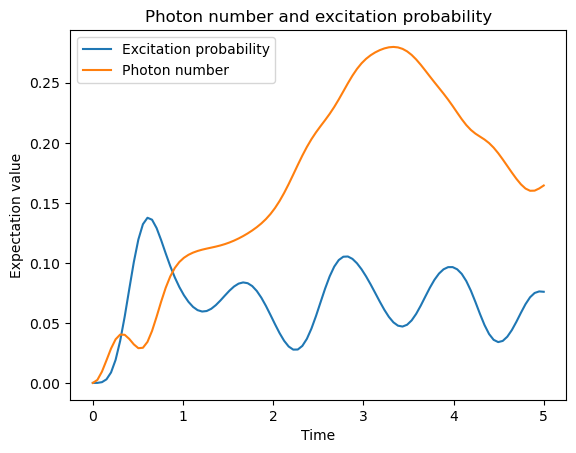

In [22]:
# Define the time vector
t = np.linspace(0, 5, 100)

# Solve with monte carlo
res = qt.mcsolve(H, psi0, t, c_ops, exp_vals, ntraj=100)

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, res.expect[0], label='Excitation probability')
ax.plot(t, res.expect[1], label='Photon number')
ax.set_xlabel('Time')
ax.set_ylabel('Expectation value')
ax.set_title('Photon number and excitation probability')
ax.legend()


In [23]:
animation = visualize_atom(t, res.expect[0])
HTML(animation.to_jshtml())

## Practice Hamiltonians

### An atom with drive

$$
\begin{align}
H &= H_{\rm{atom}} + H_{\rm{drive}} \\
H_{\rm{atom}} &= \hbar \omega_0 \sigma^\dagger \sigma \\
H_{\rm{drive}} &= \hbar \Omega \left( \sigma^\dagger + \sigma \right)
\end{align}
$$

### Two atoms

Note: the collapse operator is $\sqrt{\gamma} ( \sigma_1 + \sigma_2 )$.

$$
\begin{align}
H &= H_{\rm{atom1}} + H_{\rm{atom2}} + H_{\rm{coupling}} \\
H_{\rm{atom1}} &= \hbar \omega_0 \sigma_1^\dagger \sigma_1 \\
H_{\rm{atom2}} &= \hbar \omega_0 \sigma_2^\dagger \sigma_2 \\
H_{\rm{coupling}} &= \hbar J \left( \sigma_1^\dagger \sigma_2 + \sigma_1 \sigma_2^\dagger \right)
\end{align}
$$

### Frequency scan of a single atom

Here, $\omega_L$ is the frequency of the laser light. 

$$ 
\begin{align}
H &= H_{\rm{atom}} + H_{\rm{drive}} \\
H_{\rm{atom}} &= \hbar ( \omega_0 - \omega_L )\sigma^\dagger \sigma \\
H_{\rm{drive}} &= \hbar \Omega \left( \sigma^\dagger + \sigma \right) 
\end{align}
$$


# Appendix 

## The Schr&ouml;dinger equation

The formalism of quantum optics is very intuitive. Everything is written in terms of matrices. The Hamiltonian $\hat{H}$ is matrix that acts as the *energy* operator. The Hamiltonian tells you about the time evolution of the system via the *Schr&ouml;dinger equation*. 

$$
\hat{H} \left| \psi \right> = -\frac{\partial}{\partial t} \left| \psi \right>
$$

Here, E is the energy. Note that $\hat{H}$ is a matrix, $\left| \psi \right>$ is a vector (actually, it's a ray, but they're pretty much the same), and $E$ is a number. The solution to this gives you a wavefunction $\left| \psi \right>$ with some time evolution and energy. 

## Quantum mechanical operators
### The two-level system

Let $\left| 1 \right>$ represent the atom in the excited state, and $\left| 0 \right>$ represent the atom in the ground state. The *lowering operator* $\sigma$ takes the excited state to the ground state. 

$$
\sigma \left| 1 \right> = \left| 0 \right>
$$

The *raising operator* $\sigma^\dagger$ does the opposite. 

$$
\sigma^\dagger \left| 0 \right> = \left| 1 \right>
$$

If you try to lower the ground state or raise the excited state you get nothing. 

$$
\begin{aligned}
\sigma \left| 0 \right> &= 0  \\
\sigma^\dagger \left| 1 \right> &= 0
\end{aligned}
$$

These operators and quantum states are best represented as matrices and vectore. 

$$
\begin{aligned}
\left|1\right\rangle &=
\left(\begin{array}{c}
1\\
0
\end{array}\right) \\

\left|0\right\rangle &=\left(\begin{array}{c}
0\\
1
\end{array}\right) \\

\sigma	&=\left(\begin{array}{cc}
0 & 0\\
1 & 0
\end{array}\right) \\
\sigma^{\dagger}	&=\left(\begin{array}{cc}
0 & 1\\
0 & 0
\end{array}\right)
\end{aligned}
$$

These can easily be implemented using QuTiP in Python!


In [24]:
# Excited state
# qt.tensor makes a quantum object
# qt.basis(N, M) makes a state with N-levels and puts you in the Mth level
# The way QuTiP is set up, M=0 is the excited state
psi1 = qt.tensor(qt.basis(2,0))
psi1

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [25]:
# The lowering operator works as expected
# Lowering operator
sm = qt.sigmam()
sm

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]

In [26]:
# Unsurprisingly, when you multiply them together, you get the ground state
sm * psi1

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

These can be generalized to very large states. For example, and atom with 4 levels in the 2nd level is as follows. 

psi = qt.tensor(qt.basis(4, 4 - 2))
psi

### The Fock state

If you want more than just two states it's just as easy! A state with $n$ photons can be represented as $\left| n \right>$. The *destruction operator* $a$ takes you from $n$-many photons to $n-1$. In the case of an atom, you're just moving the electron from one state to another. But in the case of a Fock state, the operators create and destroy photons, so you get another factor $c_{n}$ out front. 

$$
\begin{aligned}
a \left| n \right> = c_{n-1} \left| n-1 \right> \\
a^\dagger \left| n \right> = c_{n+1} \left| n+1 \right> \\
\end{aligned}
$$

The following example is $\left| 4 \right>$. 

In [27]:
# We want a quantum state that can hold up to 10 photons.
# Because we also have the vacuum state, with no photons, we need 11 states total.
# In the case of photons, the states count up instead of down. I don't know why. 
N = 10  # Max number of photons
psi = qt.tensor(qt.basis(N, 4))

In [28]:
# The destruction operator gets a special function
# This function destroys one photon
a = qt.destroy(N)